

### Conduct a PCA:

First we will import all packages and tools necessary for the Project...

In [1]:
import numpy as np
import keras
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sympy import *
init_printing(use_latex=True)
from IPython.display import display

Using TensorFlow backend.


We bring in all the training data taken, then get rid of any vectors that contain nan values because they will help train out network.  We use a scaler on the data to standardise it.  We then bring in our test data, for the Partial Component Analysis(PCA) and testing.  This will give us a better idea of weither or not we will have success with our data by examining the variance to features.  We also use the same function devised to transform our training data to transform our testing data, so the network is not misinformed about the relationships in the features.

In [3]:
data = np.array(pandas.read_csv("./Demo/training_noavg.csv", header=0))
## bring in loc 0 -1 test data for PCA
data1 = np.array(pandas.read_csv("./Demo/test1.csv", header=0))
data2 = np.array(pandas.read_csv("./Demo/test2.csv", header=0))
data3 = np.array(pandas.read_csv("./Demo/test3.csv", header=0))
## Have to drop all teh rows that have nan values because they will not help with net
## clean out rows with nan values
data = data[~np.isnan(data).any(axis=1)]
data1 = data1[~np.isnan(data1).any(axis=1)]
data2 = data2[~np.isnan(data2).any(axis=1)]
data3 = data3[~np.isnan(data3).any(axis=1)]

print(data[:8])
print(data.shape)

data = np.vstack((data,data1,data2,data3))
print(data[:8])
data.shape

[[-45. -45. -46. -47. -55. -57. -57. -61.   0.]
 [-46. -46. -54. -54. -57. -54. -58. -60.   0.]
 [-45. -45. -46. -46. -56. -54. -58. -60.   0.]
 [-46. -46. -46. -53. -55. -55. -58. -58.   0.]
 [-47. -46. -46. -46. -54. -55. -58. -58.   0.]
 [-45. -45. -47. -59. -56. -54. -58. -57.   0.]
 [-47. -46. -47. -47. -56. -55. -59. -58.   0.]
 [-45. -45. -44. -56. -56. -55. -58. -58.   0.]]
(1543, 9)
[[-45. -45. -46. -47. -55. -57. -57. -61.   0.]
 [-46. -46. -54. -54. -57. -54. -58. -60.   0.]
 [-45. -45. -46. -46. -56. -54. -58. -60.   0.]
 [-46. -46. -46. -53. -55. -55. -58. -58.   0.]
 [-47. -46. -46. -46. -54. -55. -58. -58.   0.]
 [-45. -45. -47. -59. -56. -54. -58. -57.   0.]
 [-47. -46. -47. -47. -56. -55. -59. -58.   0.]
 [-45. -45. -44. -56. -56. -55. -58. -58.   0.]]


In [4]:
# vectors AND class labels...
X = data[:,0:8] # 0 thru 30
Y = data[:,8] # 30

scaler = StandardScaler()
# standardize X .. will mean center data
X = scaler.fit_transform(X)

# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(Matrix(np.unique(Y)).T)
display(X[0:8])

[0.0  1.0  2.0  3.0]

array([[-0.47867833,  0.94197069,  0.59669927,  0.40920824, -0.97487193,
        -0.29237974, -1.44637871, -0.61627818],
       [-0.83253276,  0.69813926, -1.19666385, -1.32373377, -1.44525322,
         0.73812832, -1.77674642, -0.40108507],
       [-0.47867833,  0.94197069,  0.59669927,  0.65677138, -1.21006257,
         0.73812832, -1.77674642, -0.40108507],
       [-0.83253276,  0.69813926,  0.59669927, -1.07617063, -0.97487193,
         0.39462564, -1.77674642,  0.02930115],
       [-1.1863872 ,  0.69813926,  0.59669927,  0.65677138, -0.73968128,
         0.39462564, -1.77674642,  0.02930115],
       [-0.47867833,  0.94197069,  0.37252888, -2.56154949, -1.21006257,
         0.73812832, -1.77674642,  0.24449426],
       [-1.1863872 ,  0.69813926,  0.37252888,  0.40920824, -1.21006257,
         0.39462564, -2.10711413,  0.02930115],
       [-0.47867833,  0.94197069,  1.04504006, -1.81886006, -1.21006257,
         0.39462564, -1.77674642,  0.02930115]])

Here we can see that our training data and testing data has been combined so we can analyse it all at the same time.  We use singular value decomposition, to examine each feature component and how it effects the total variance of the data.

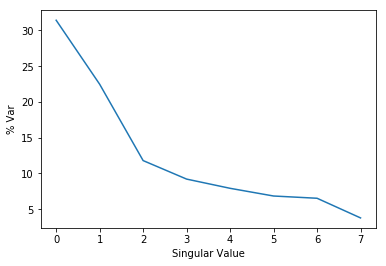

In [5]:
U,S,V = np.linalg.svd(X,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [17]:
# Variance accounted for in the first two principal components
100.0*(S[0]+S[1])/np.sum(S)

We see that more than 53% of the variance is accounted for by the first two principal components, so they should give use some dece3nt information about the desicion boundries our network will see.

In [6]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)
# Extract just the first two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

Here we use the matplot lib package and associate colors to the data that describes each class, as well as our testing data.

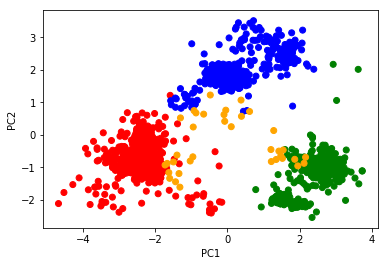

In [7]:
# The x and y values come from the two
# Principal Components and the colors for
# each point are selected based on the
# corresponding class for each point...
plt.scatter(PCs[:,0],PCs[:,1],
color=[['red','green','blue','orange'][i] for i in Y.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The graph suggests that we will be able to create descision boundries fairly easily because our classses are very well grouped.  The orange dots represent the testing data, we can clearly see three seperate groupings that coincide with the three location classes.  This gives us a high level of confidence that our method will work.

At this point you should open up the Project_Multilayer_Net_2.ipynb and follow allong with building the network.  Then once that is complete, come back to this point and run through the rest of this demo to see the testing phase.

https://github.com/CSCI4850/S19-team2-project/blob/master/Demo/Project_Multilayer_Net_2.ipynb

Now that we have a trained network we will bring back in the training and testing data (you may have to re import the first cell with our packages), we can now see how to give our saved model a vector to predict.  THe testing data is stored as test vectors for each loacation.  We can see under the next cell that the first loaction accounts for the first 14 testing vectors and the 2nd location, the next 11.

In [20]:
## bring in data to scale so that testing data is transformed with the same scaling function
data = np.array(pandas.read_csv("./training_noavg.csv", header=0))
## Have to drop all the rows that have nan values because they will not help with net
## clean out rows with nan values
data = data[~np.isnan(data).any(axis=1)]
X = data[:,0:8]

scaler = StandardScaler()
X = scaler.fit_transform(X)

test1 = np.array(pandas.read_csv("./test1.csv", header=0))
test2 = np.array(pandas.read_csv("./test2.csv", header=0))
test3 = np.array(pandas.read_csv("./test3.csv", header=0))
test1 = test1[:,0:8]
test2 = test2[:,0:8]
test3 = test3[:,0:8]
test1 = test1[~np.isnan(test1).any(axis=1)]
test2 = test2[~np.isnan(test2).any(axis=1)]
test3 = test3[~np.isnan(test3).any(axis=1)]
print(test1.shape)
print(test2.shape)
test = np.vstack((test1,test2,test3))

test = scaler.transform( test )

print(test.shape)

(14, 8)
(11, 8)
(36, 8)


We no have the function used to standardize our data and we have run it on our testing data so that our network knows how to classify it properly.  We will then load in our netwrok model and weights.

In [21]:
model = keras.models.load_model('./MLN.model')
model.load_weights('./MLN.weights')

Now it is simply a matter of using keras' predict function to provide us with the networks best guess at the vectors location class.  Here we use argmax to get the class label, and can look at the probability associated with each vector in relation to each class.

In [22]:
preds = model.predict(test, batch_size=1, verbose=1, steps=None)

#print('Predicted:', preds[:])
for i in range(0,36):
    print(np.argmax(preds[i,]))
    print(preds[i])

36/36 [==============================] - 0s 2ms/step
0
[9.9968445e-01 1.4588970e-04 1.6967411e-04]
0
[9.9962330e-01 1.8215337e-04 1.9444141e-04]
0
[9.9570894e-01 8.4386364e-04 3.4472430e-03]
0
[9.9876606e-01 5.6977588e-04 6.6410442e-04]
0
[9.911083e-01 7.381429e-04 8.153469e-03]
0
[9.9900240e-01 4.6980544e-04 5.2775902e-04]
0
[0.94023657 0.00220363 0.05755987]
0
[9.9957329e-01 1.9717493e-04 2.2947062e-04]
0
[9.993284e-01 2.914601e-04 3.801830e-04]
0
[9.9970740e-01 1.3877284e-04 1.5390110e-04]
0
[9.9968231e-01 1.5028863e-04 1.6740648e-04]
0
[9.9966884e-01 1.6068536e-04 1.7051739e-04]
0
[9.9965894e-01 1.4968892e-04 1.9133295e-04]
0
[9.9968445e-01 1.5928967e-04 1.5623614e-04]
1
[0.00127999 0.9959037  0.00281639]
1
[7.1183778e-04 9.9832124e-01 9.6690637e-04]
1
[3.7411333e-04 9.9923289e-01 3.9296428e-04]
1
[2.7113431e-04 9.9936134e-01 3.6757241e-04]
1
[2.1579840e-04 9.9954516e-01 2.3901038e-04]
1
[4.8526586e-04 9.9856478e-01 9.4987522e-04]
1
[4.8304655e-04 9.9892896e-01 5.8807252e-04]
1
[4.

Our network has predicted all 36 of the testing locations correctly(first 14 are loc 0, second 11 are loc1, final 11 are loc 2, as per class labels).  We now have a tool that can be integrated into an application that allows use to fingerprint a location and provide very accurate location information to a user for any prospective reason.  Based on the output we can increase the number of locations by a magnitude of 10^3 and still gain accurate predictions.  This would allow us to have hundreds or thousands of locations.  We will need to test this in the future. This tool has a farily simple structure and short amount of setup and train time.